## Concept Questions  

**What are primary keys and foreign keys? How are they used in relational databases?**
- Primary Key (PK)
	- A primary key uniquely identifies each row in a table.
	- A table can only have one primary key (can be compound keys).
	- PK values cannot be NULL and must be unique.

- Foreign Key (FK)
	- A foreign key creates a link between two tables (tuples).
	- It references a primary key from another table.
	- It enforces referential integrity, meaning you cannot insert invalid relationships or delete referenced rows unless handled properly.

- Usage
	- PK ensures every row is uniquely identifiable.
	- FK ensures tables stay connected and consistent.  


**What is the difference between INNER JOIN, LEFT JOIN, and FULL OUTER JOIN?**
- INNER JOIN
	- Returns only rows where the join condition matches in both tables.
	- No match → row excluded.

- LEFT JOIN
	- Returns all rows from the left table.
	- If right table has no match → right side columns are NULL.

- FULL OUTER JOIN
	- Returns all rows from both tables.
	- Non-matching rows on either side become NULL on the opposite side.

**What is normalization?**
- Normalization is the process of organizing a database to reduce redundancy and improve data integrity.
- shouldn't be applied during Logical Model design procedure (conceptural -> logical -> physical)
- In simple terms:
	- You split data into smaller related tables.
	- You remove duplicate data.
	- You ensure every table has a single clear purpose.

- Usually normalize to 3rd Normal Form:
	- 1NF: No repeating groups; atomic columns.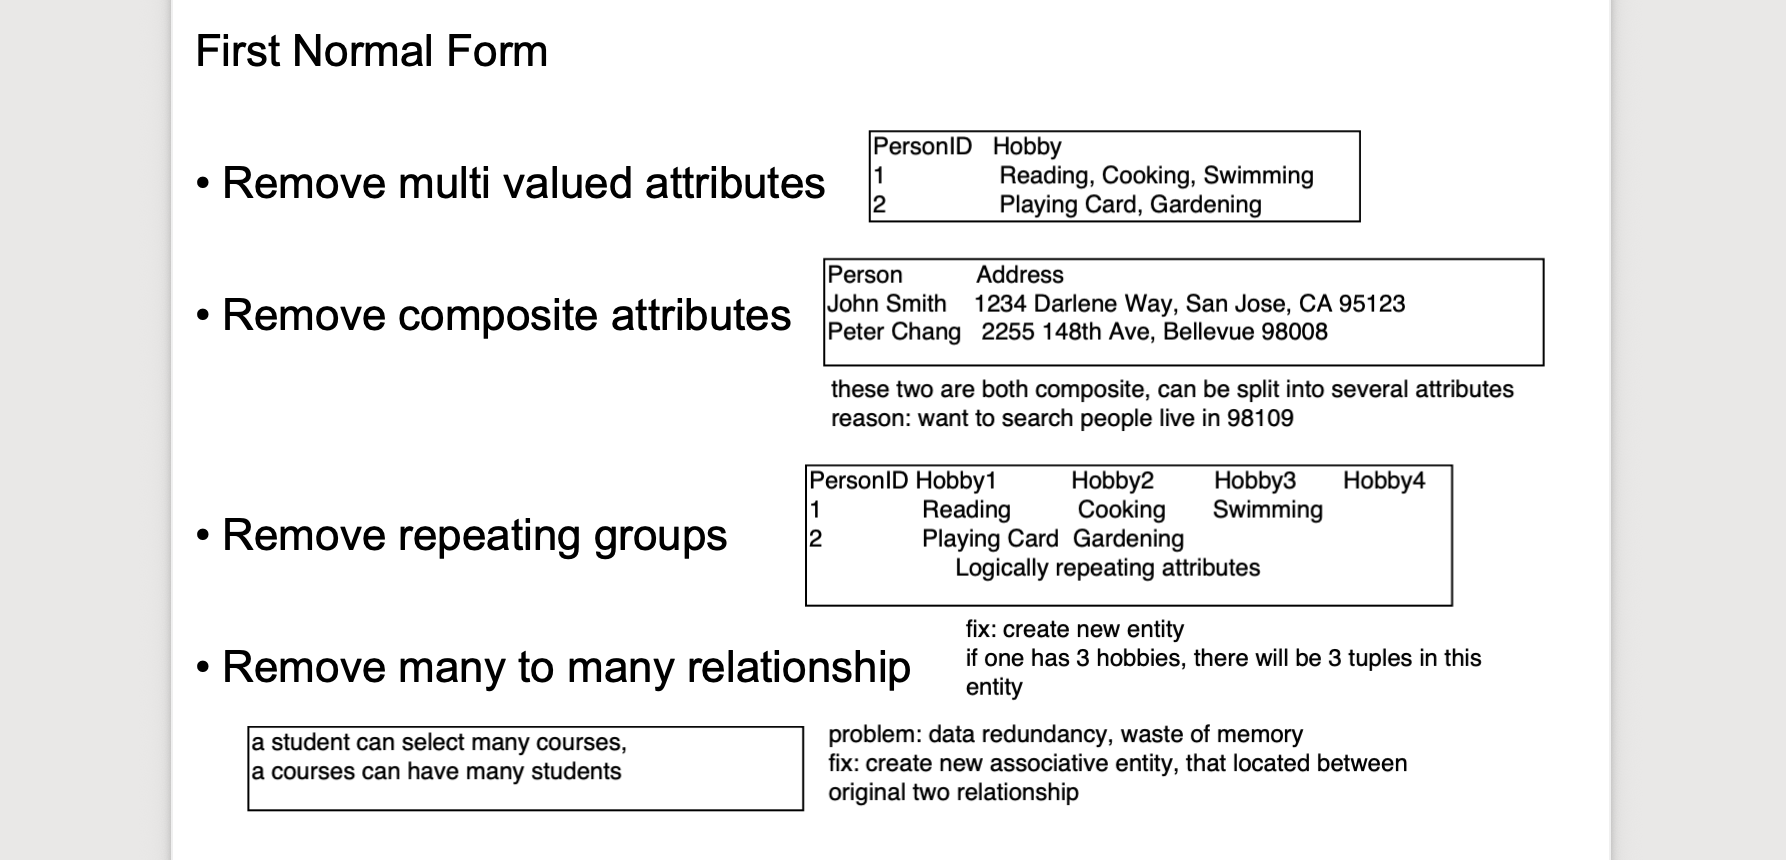
	- 2NF: No partial dependency on part of a composite key.
	- 3NF: No transitive dependencies (a non-key attribute depend on another non-key that depend on the PK), non-key fields must depend only on the key.

**What are the different types of database relationships (1:1, 1:many, many:many) and how do you implement them in SQL?**
- 1-to-1 (1:1)
	- One row in Table A matches one row in Table B.
	- Implement by putting a unique foreign key in one table.
	- e.g.: one user can have one profile, one profile belongs to one user
		```sql
		ALTER TABLE Profile  
		ADD CONSTRAINT fk_profile_user  
		FOREIGN KEY (user_id) REFERENCES Users(id),  
		ADD UNIQUE (user_id);
		```
- 1-to-Many (1:N)
	- One row in Table A relates to many rows in Table B.
	- The “many” table gets the foreign key.
	- e.g.: one customer can have more than zero orders, but one order record belongs to one customer 
		```sql
		ALTER TABLE Orders
		ADD FOREIGN KEY (customer_id) REFERENCES Customers(id);
		```
- Many-to-Many (M:N)
	- Requires a junction table with two foreign keys.
	- e.g.: one student can register many courses, one courses can be registered by many students
		```sql
		CREATE TABLE StudentCourse (
		student_id INT,
		course_id INT,
		FOREIGN KEY (student_id) REFERENCES Students(id),
		FOREIGN KEY (course_id) REFERENCES Courses(id),
		PRIMARY KEY (student_id, course_id)
		);		
		```

**What are transactions and isolation levels? Explain the problems each isolation level solves.**
- A transaction is a group of SQL operations executed as a single unit.
It follows ACID: Atomicity, Consistency, Isolation, Durability.
	```sql
	BEGIN;
	UPDATE accounts SET balance = balance - 100 WHERE id = 1;
	UPDATE accounts SET balance = balance + 100 WHERE id = 2;
	COMMIT;
	```
- 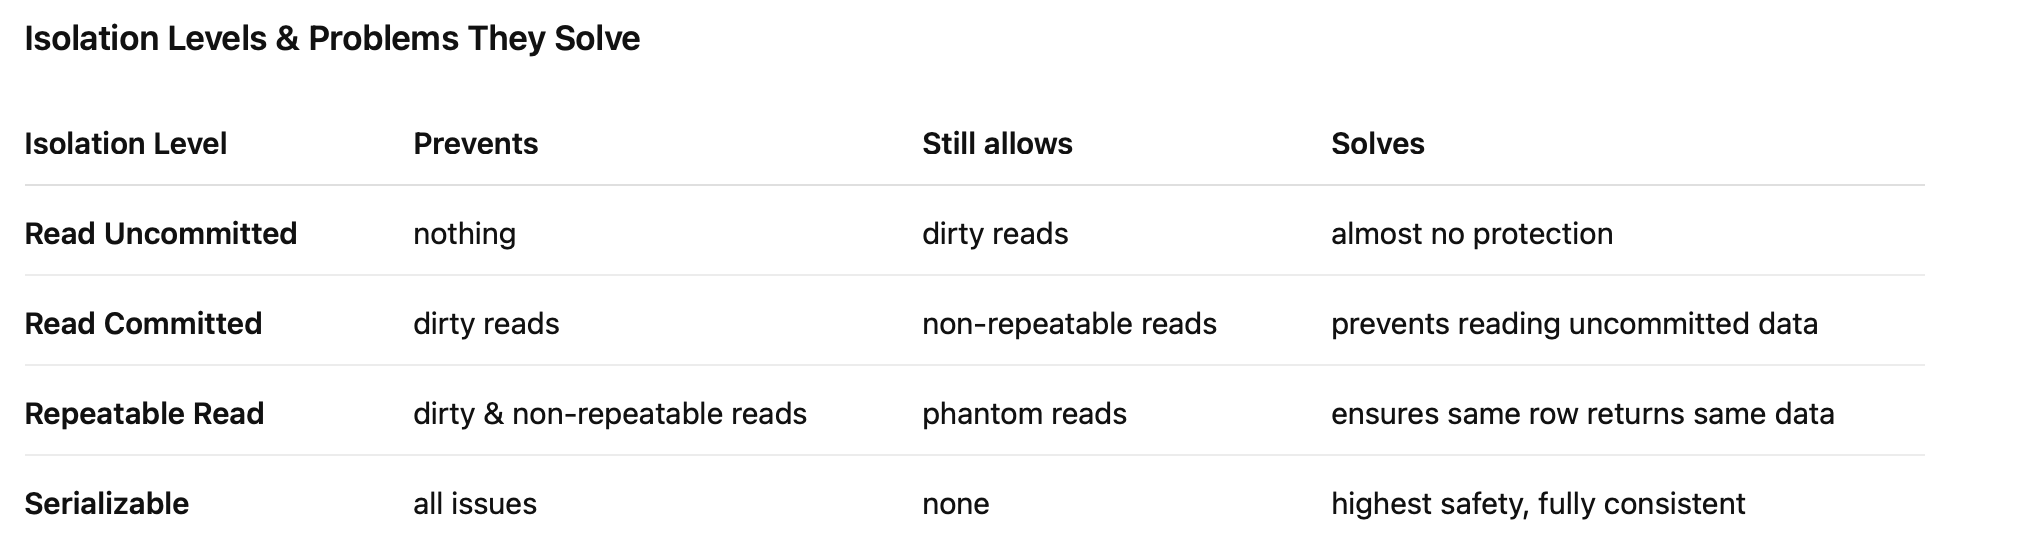
- Key problems defined simply:
	- Dirty read: You read uncommitted data.
	- Non-repeatable read: Same query returns different results within one transaction.
	- Phantom read: New rows appear during your transaction.

**What's the difference between PRIMARY KEY, UNIQUE, and FOREIGN KEY constraints?**
- PRIMARY KEY
	- Uniquely identifies each row.
	- Cannot be NULL.
	- One per table.

- UNIQUE
	- Ensures values are unique.
	- Can have multiple UNIQUE constraints per table.
	- Allows one NULL (DB-dependent).

- FOREIGN KEY
	- Enforces relationships between tables.
	- Ensures referenced value exists in another table.
	- Does not enforce uniqueness unless combined with UNIQUE.

## Coding Challenge 1: SQL Practice

### Description
Practice the challenges in 
- https://pgexercises.com/questions/basic/
- https://pgexercises.com/questions/joins/ 

Extra:
- https://pgexercises.com/questions/aggregates/


## Coding Challenge 2: Library Management System - Database Integration


In [3]:
!python /Users/yannisshen/Documents/GitHub/pilot/LibraryMgtSys/library_integrated.py

LIBRARY MANAGEMENT SYSTEM - DATABASE INTEGRATION DEMO

Initializing database...
Database initialized!


--- Added Items to Database ---
Total items in library: 3

--- Added Members ---
Alice (Regular): Max 3 items
Bob (Premium): Max 5 items

--- Testing Borrow Operations ---
Alice borrowed 'Python Crash Course'
Alice's borrowed count: 1

--- Testing Waiting List ---
Alice tries to borrow 'The Matrix': False
Alice joined waiting list for 'The Matrix'

--- Testing Return & Notifications ---
Bob returned 'The Matrix'
Alice's notifications: ["'The Matrix' is now available"]

DEMO COMPLETED!
